### In order to demonstrate the power of vectorization, we are going to simulate a bunch of Lorenz system trajectories the slow way first

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp
import time  # for timing code

# Lorenz's parameters (chaotic)
sigma = 10 
beta = 8 / 3
rho = 28

# Define two functions we need
def rk4singlestep(fun, dt, t0, y0):
    """
        Long comments describing functions or other complicated
        classes can be left with the triple-quotes notation like this.
        
        This function does a single 4th-order Runge-Kutta step for ODE integration,
        where fun is the ODE, dt is the timestep, t0 is the current time, and y0 is
        the current initial condition. 
    """
    f1 = fun(t0, y0)
    f2 = fun(t0 + dt / 2, y0 + (dt / 2) * f1)
    f3 = fun(t0 + dt / 2, y0 + (dt / 2) * f2)
    f4 = fun(t0 + dt, y0 + dt * f3)
    yout = y0 + (dt / 6) * (f1 + 2 * f2 + 2 * f3 + f4)
    return yout

def lorenz(t, y):
    """
        This function defines the dynamical equations
        that represent the Lorenz system. 
        
        Normally we would need to pass the values of
        sigma, beta, and rho, but we have already defined them
        globally above.
    """
    # y is a three dimensional state-vector
    dy = [sigma * (y[1] - y[0]), 
          y[0] * (rho - y[2]) - y[1],
          y[0] * y[1] - beta * y[2]]
    return np.array(dy)

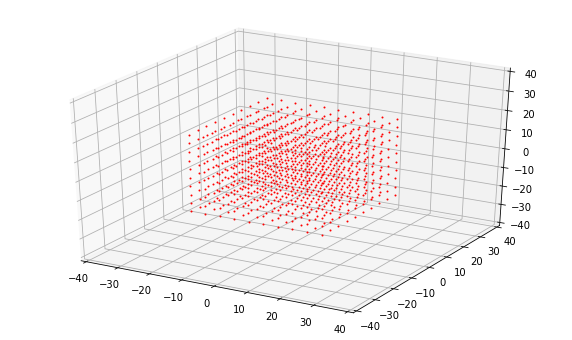

In [2]:
# Initial condition - large cube of points
n = 10
xvec = np.linspace(-20, 20, n)
yvec = np.linspace(-20, 20, n)
zvec = np.linspace(-20, 20, n)
[x0, y0, z0] = np.meshgrid(xvec, yvec, zvec)

yIC = np.zeros((3, n ** 3))
yIC[0, :] = x0.reshape(n ** 3)
yIC[1, :] = y0.reshape(n ** 3)
yIC[2, :] = z0.reshape(n ** 3)

ax = plt.figure(figsize=(10, 6)).add_subplot(projection='3d')  # make a 3D plot
ax.plot(yIC[0, :], yIC[1, :], yIC[2, :], 'r.', linewidth=2, markersize=2)
plt.xlim(-40, 40)
plt.ylim(-40, 40)
ax.set_zlim(-40, 40)
plt.show()

Total time elapsed =  9.64267897605896  seconds


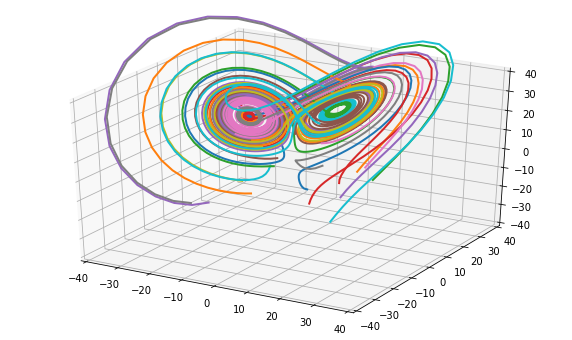

In [3]:
# Compute trajectory 
dt = 0.01
duration = 4
tspan =[0, duration] 
L = int(duration / dt)
yparticles = np.zeros((3, L, n, n, n))
yparticles[:, 0, :, :, :] = yIC.reshape(3, n, n, n)

# this code is slow because Python is not compiled
# we use nested for loops to step through every single IC in the cube
# one at a time...
start_time = time.time()
images = []
for step in range(L - 1):
    tstep = step * dt   
    for i in range(n):
        for j in range(n):
            for k in range(n):
                yin = yparticles[:, step, i, j, k]
                yout = rk4singlestep(lorenz, dt, tstep, yin)
                yparticles[:, step + 1, i, j, k] = yout

end_time = time.time()
print('Total time elapsed = ', end_time - start_time, ' seconds')

# Make plots of twenty of the trajectories
reshaped_yparticles = yparticles.reshape(3, L, n ** 3)    
ax = plt.figure(figsize=(10, 6)).add_subplot(111, projection='3d')  # make a 3D plot
for i in np.random.choice(n ** 3, 20):
    ax.plot(reshaped_yparticles[0, :, i], 
            reshaped_yparticles[1, :, i], 
            reshaped_yparticles[2, :, i], 
            linewidth=2)
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_zlim(-40, 40)
plt.show()